Student Habits and Academic Performance Dataset

Импортируем библиотеки

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import (mean_squared_error, 
                           r2_score, 
                           precision_recall_curve, 
                           f1_score, 
                           classification_report,
                           confusion_matrix)
import shap
from lime import lime_tabular
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')



# 1. Загружаем датасет и заранее обрабатываем данные

Добавим один признак leisure_time

И удалим student_id

In [25]:

file_path = r'C:\Users\Кирилл\Downloads\archive (3)\enhanced_student_habits_performance_dataset\enhanced_student_habits_performance_dataset.csv'
data = pd.read_csv(file_path)
print("Первые строки датасета до обработки")
display(data.head(10))
data = data.drop('student_id', axis=1, errors='ignore')


data['leisure_time'] = data['social_media_hours'] + data['netflix_hours']
print("Первые и последние строки датасета после обработки")

display(data.head(10))

display(data.tail(10))

Первые строки датасета до обработки


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84
8,100008,28,Female,Psychology,0.600000,0.3,2.6,Yes,64.2,7.6,...,4.8,Library,No,Low,4,4,10,Kinesthetic,5.8,70
9,100009,19,Male,Engineering,5.200000,1.1,1.6,Yes,40.1,7.2,...,8.0,Cafe,Yes,Medium,7,9,6,Auditory,7.0,100


Первые и последние строки датасета после обработки


,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,leisure_time
0,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,Poor,...,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100,3.1
1,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,Good,...,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99,0.9
2,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,Good,...,Library,Yes,High,3,9,6,Kinesthetic,7.6,98,4.9
3,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,Fair,...,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100,6.9
4,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,Good,...,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98,3.5
5,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,Good,...,Quiet Room,No,High,1,10,5,Visual,3.9,94,3.0
6,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,Good,...,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97,4.6
7,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,Fair,...,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84,4.1
8,28,Female,Psychology,0.600000,0.3,2.6,Yes,64.2,7.6,Fair,...,Library,No,Low,4,4,10,Kinesthetic,5.8,70,2.9
9,19,Male,Engineering,5.200000,1.1,1.6,Yes,40.1,7.2,Fair,...,Cafe,Yes,Medium,7,9,6,Auditory,7.0,100,2.7


,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score,leisure_time
79990,25,Male,Engineering,2.200000,2.4,3.2,Yes,89.8,7.3,Poor,...,Library,Yes,Low,10,6,9,Auditory,1.7,92,5.6
79991,24,Female,Engineering,0.000000,2.5,1.2,Yes,62.3,4.1,Good,...,Dorm,No,High,4,2,10,Visual,4.0,81,3.7
79992,20,Other,Computer Science,5.627152,0.6,3.9,Yes,66.0,5.3,Good,...,Co-Learning Group,Yes,Low,2,7,8,Auditory,3.2,76,4.5
79993,28,Male,Arts,1.300000,1.9,1.9,Yes,75.7,5.3,Good,...,Quiet Room,Yes,Medium,2,3,10,Kinesthetic,8.3,60,3.8
79994,24,Other,Business,3.800000,3.2,2.6,No,96.0,6.8,Good,...,Library,No,Low,2,1,10,Auditory,1.6,100,5.8
79995,16,Male,Engineering,3.700000,2.1,1.0,Yes,80.8,6.1,Fair,...,Library,No,Low,1,4,10,Auditory,5.3,88,3.1
79996,16,Female,Business,1.200000,0.4,2.9,No,99.5,4.1,Good,...,Co-Learning Group,No,Low,3,2,10,Kinesthetic,6.8,52,3.3
79997,26,Female,Arts,4.100000,1.6,1.6,Yes,46.1,8.3,Good,...,Dorm,No,Medium,7,1,10,Visual,1.3,89,3.2
79998,23,Other,Biology,3.800000,0.6,3.5,Yes,58.7,5.8,Good,...,Quiet Room,Yes,Low,2,8,7,Kinesthetic,3.7,96,4.1
79999,25,Other,Engineering,3.000000,4.5,3.4,Yes,97.7,5.3,Fair,...,Co-Learning Group,Yes,Medium,1,8,7,Reading,6.7,100,7.9


# 2. Разведочный анализ

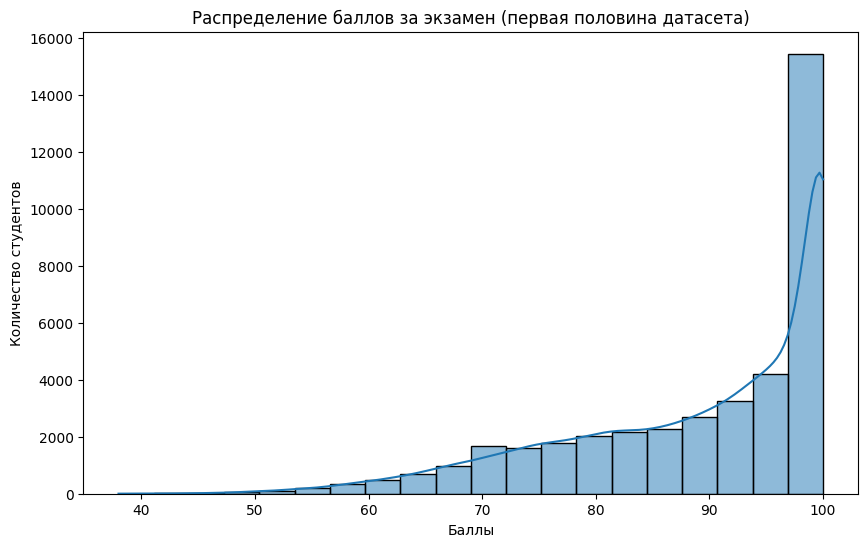

In [26]:
half_idx = len(data) // 2
data_first_half = data.iloc[:half_idx].copy()  
data_second_half = data.iloc[half_idx:].copy() 


plt.figure(figsize=(10, 6))
sns.histplot(data_first_half['exam_score'], kde=True, bins=20)
plt.title('Распределение баллов за экзамен (первая половина датасета)')
plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.show()

# 3. Подготовка данных

In [27]:
X = data_first_half.drop('exam_score', axis=1)
y = data_first_half['exam_score']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Обучение модели

In [28]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# 5. Оценка модели

In [29]:
y_pred = model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

RMSE: 4.28
R2 Score: 0.86


# 6. Анализ признаков

In [30]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)


# 7. Визуализация

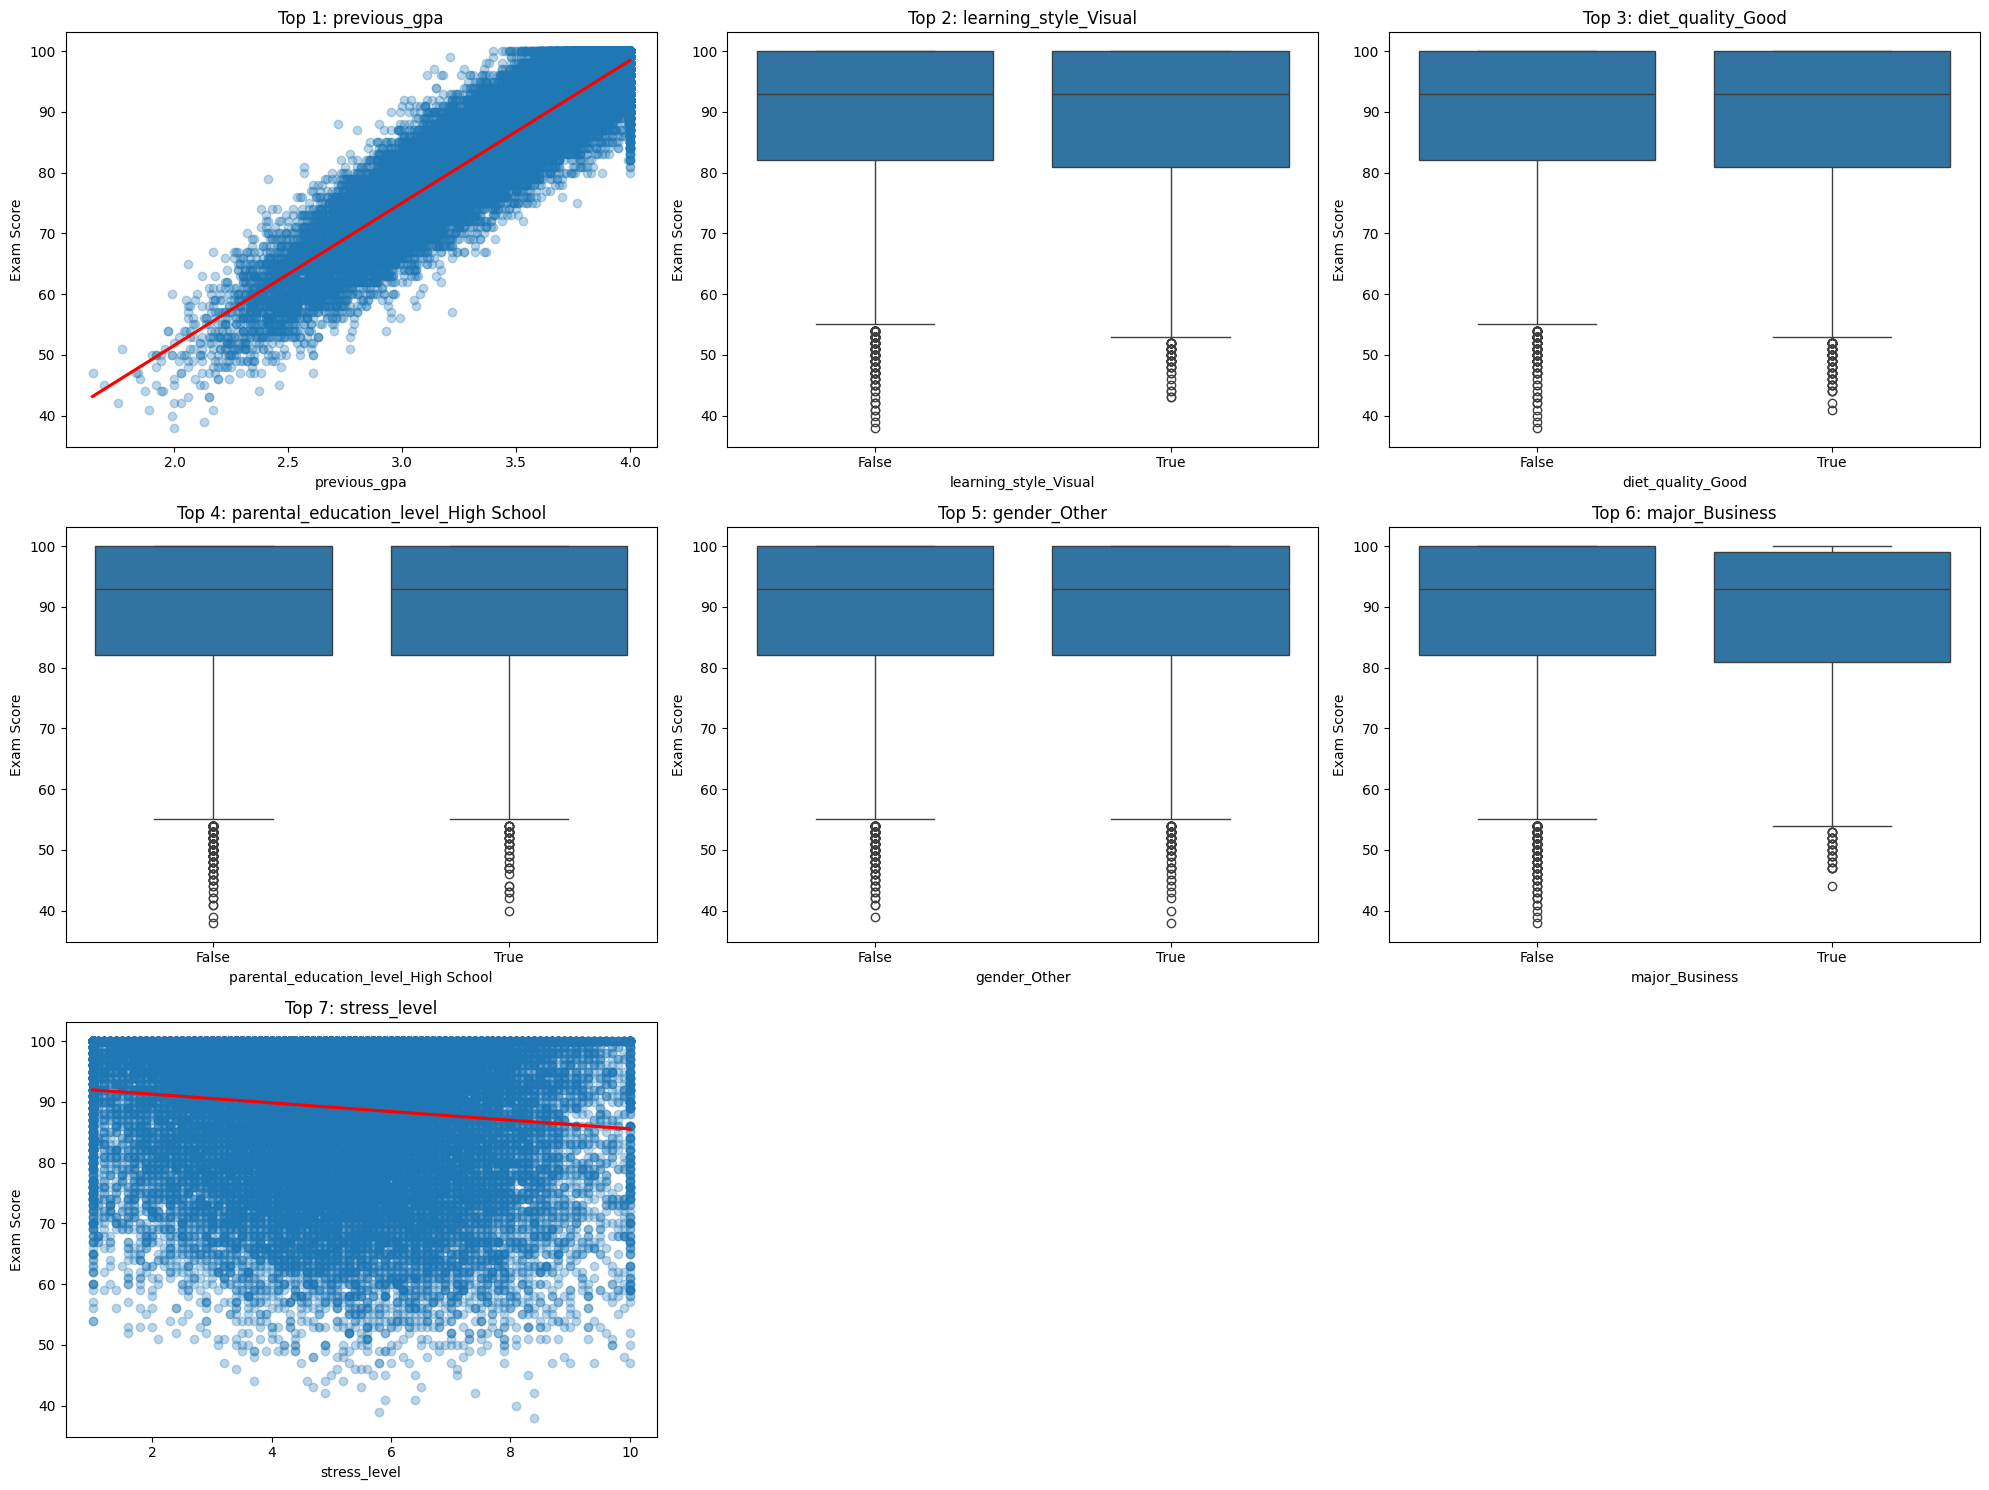

In [31]:
analysis_df = data_first_half.copy()
for feature in importance.head(7)['Feature']:
    if feature not in analysis_df.columns and feature in X.columns:
        analysis_df[feature] = X[feature]


top_features = importance.head(7)['Feature'].values


plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 3, i)
    
    if analysis_df[feature].nunique() == 2:
        sns.boxplot(x=analysis_df[feature], y=analysis_df['exam_score'])
    elif analysis_df[feature].nunique() < 15:
        sns.violinplot(x=analysis_df[feature], y=analysis_df['exam_score'])
    else:
        sns.regplot(x=analysis_df[feature], y=analysis_df['exam_score'], 
                   scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    
    plt.title(f'Top {i}: {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Exam Score', fontsize=10)
plt.tight_layout()
plt.show()


# 8. LIME

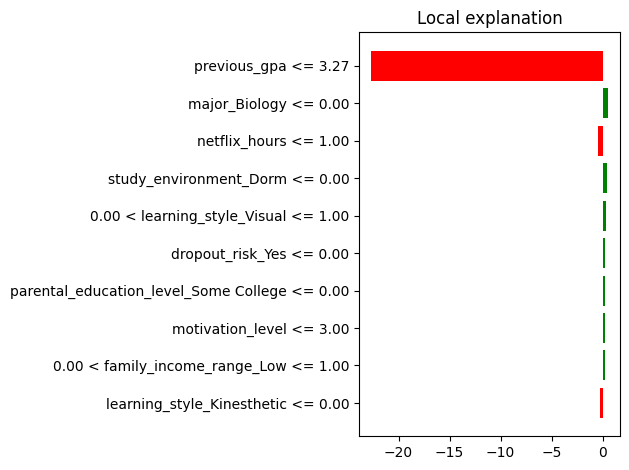


Фактический балл: 79.0
Предсказанный балл: 80.9

Влияние признаков:
previous_gpa <= 3.27: -22.7022
major_Biology <= 0.00: 0.5490
netflix_hours <= 1.00: -0.4247
study_environment_Dorm <= 0.00: 0.3945
0.00 < learning_style_Visual <= 1.00: 0.3041
dropout_risk_Yes <= 0.00: 0.2872
parental_education_level_Some College <= 0.00: 0.2834
motivation_level <= 3.00: 0.2713
0.00 < family_income_range_Low <= 1.00: 0.2377
learning_style_Kinesthetic <= 0.00: -0.2310


In [32]:
explainer_lime = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    verbose=False,
    mode='regression'
)

idx = 10 
exp = explainer_lime.explain_instance(X_test.iloc[idx].values, model.predict)

fig = exp.as_pyplot_figure()

plt.tight_layout()
plt.show()

print(f"\nФактический балл: {y_test.iloc[idx]:.1f}")
print(f"Предсказанный балл: {y_pred[idx]:.1f}")
print("\nВлияние признаков:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")

Видим, что наибольший и практически едиственный важный для модели атрибут previous_gpa

В рамках курсовой работы решил, кроме него оставить еще 6 лучших атрибутов, чтобы посмотреть, что в итоге получится

# 9. Выбираем лучшие атрибуты


Использовано 40000 строк
Количество столбцов: 8
Столбцы: ['previous_gpa', 'dropout_risk', 'study_environment', 'diet_quality', 'parental_education_level', 'major', 'mental_health_rating', 'exam_score']

Первые 5 строк отфильтрованного датасета:


,previous_gpa,dropout_risk,study_environment,diet_quality,parental_education_level,major,mental_health_rating,exam_score
40000,4.00,No,Library,Good,Some College,Arts,8.3,93
40001,4.00,No,Library,Good,Bachelor,Computer Science,10.0,100
40002,3.11,No,Library,Fair,Some College,Engineering,5.1,80
40003,4.00,No,Dorm,Good,Master,Engineering,4.4,94
40004,3.11,No,Dorm,Good,PhD,Business,9.2,78


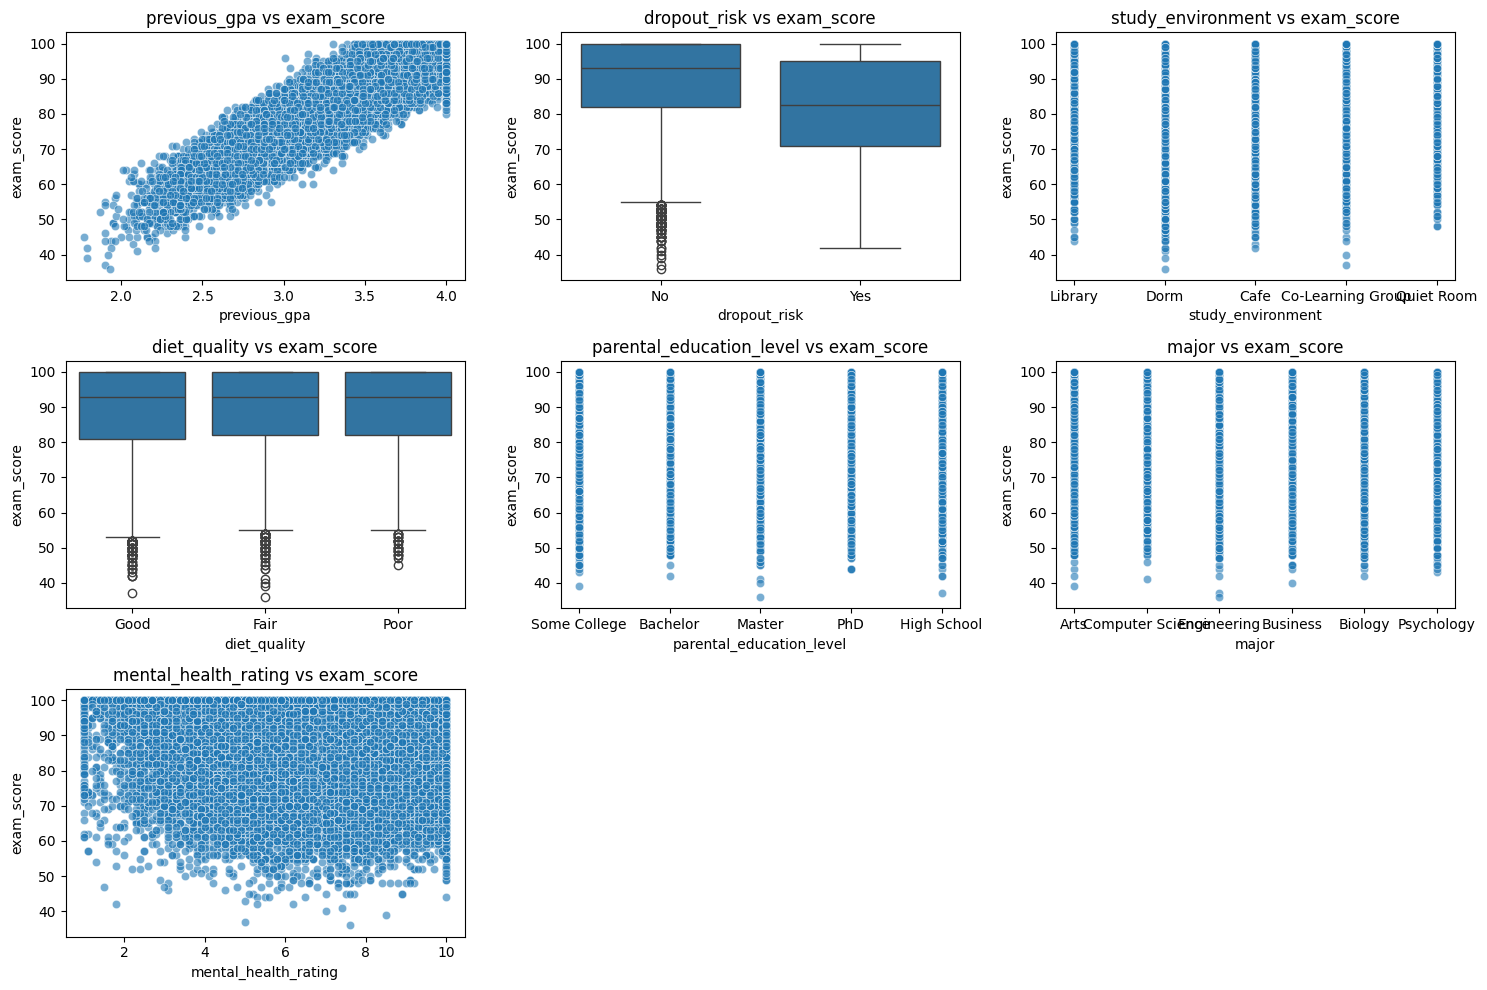

In [33]:
top_features = [
    'previous_gpa',
    'dropout_risk', 
    'study_environment',
    'diet_quality',
    'parental_education_level',
    'major',
    'mental_health_rating'
]


available_features = [feat for feat in top_features if feat in data_second_half.columns]
selected_features = available_features + ['exam_score']


filtered_data = data_second_half[selected_features].copy()


print(f"\nИспользовано {len(data_second_half)} строк")
print(f"Количество столбцов: {len(filtered_data.columns)}")
print(f"Столбцы: {list(filtered_data.columns)}")
print("\nПервые 5 строк отфильтрованного датасета:")
display(filtered_data.head())


plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    if filtered_data[col].nunique() < 5:
        sns.boxplot(x=col, y='exam_score', data=filtered_data)
    else:
        sns.scatterplot(x=col, y='exam_score', data=filtered_data, alpha=0.6)
    plt.title(f'{col} vs exam_score')
plt.tight_layout()
plt.show()

# 10. Настройка модели

In [34]:
median_score = data_second_half['exam_score'].median()
y_class = (data_second_half['exam_score'] > median_score).astype(int)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    pd.get_dummies(data_second_half.drop('exam_score', axis=1), drop_first=True), 
    y_class, 
    test_size=0.2, 
    random_state=42
)


model_class = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train_class[y_train_class==0])/len(y_train_class[y_train_class==1]),
    random_state=42
)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(
    estimator=model_class,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_class, y_train_class)


best_model = grid_search.best_estimator_
print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучший F1-score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Лучший F1-score: 0.8899


# 11. Оценка модели

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4102
           1       0.84      0.93      0.89      3898

    accuracy                           0.88      8000
   macro avg       0.89      0.88      0.88      8000
weighted avg       0.89      0.88      0.88      8000



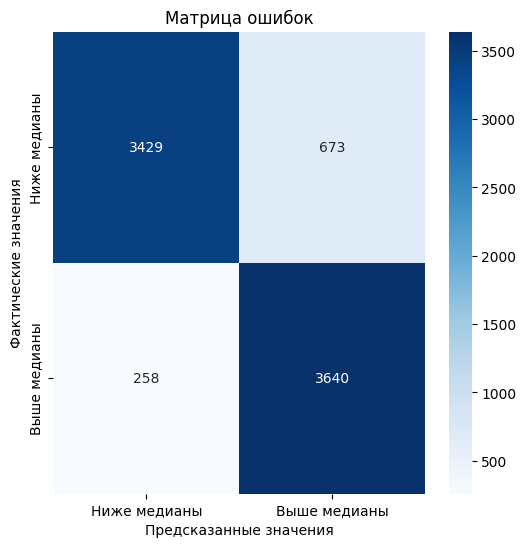

In [35]:
y_pred_class = best_model.predict(X_test_class)
y_probs = best_model.predict_proba(X_test_class)[:, 1]

print(classification_report(y_test_class, y_pred_class))


cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ниже медианы', 'Выше медианы'],
            yticklabels=['Ниже медианы', 'Выше медианы'])
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()


# 12. Precision-Recall

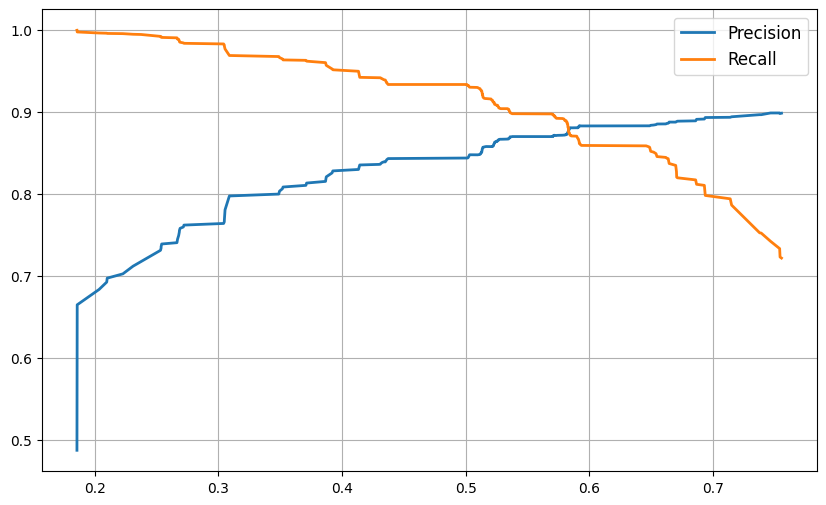

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_test_class, y_probs)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


По данным пуктов 11 и 12 видим нормальный баланс между точностью и полностой 

# 13. Оптимальный порог

In [37]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold:.4f}")
print(f"Max F1-score: {f1_scores[optimal_idx]:.4f}")

y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
print(classification_report(y_test_class, y_pred_optimal))

Оптимальный порог: 0.5137
Max F1-score: 0.8876
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4102
           1       0.86      0.92      0.89      3898

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



# 14 Важность атрибутов

<Figure size 1200x800 with 0 Axes>

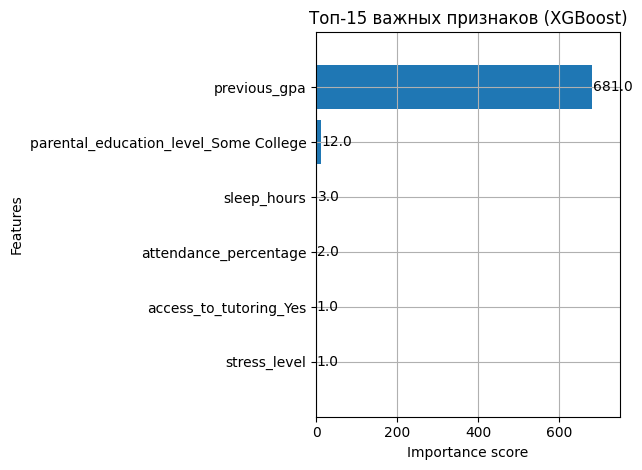

In [38]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(best_model, max_num_features=15, importance_type='weight', 
                    height=0.8, color='#1f77b4', grid=True)
plt.title('Топ-15 важных признаков (XGBoost)')
plt.tight_layout()
plt.show()

# 15. SHAP

In [ ]:
shap.initjs()


explainer = shap.Explainer(model)
shap_values = explainer(X_train)



print("\nForce plot для первых 100 примеров:")
shap_force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values.values[:100],
    X_test.iloc[:100],
    feature_names=X_train.columns
)

from IPython.display import HTML
HTML(shap_force_plot.html())

И снова можно наблюдать, что оценки зависят практически только от предыдущей успеваемости